<h1 align="center"> PCA + Logistic Regression (MNIST) </h1>

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
<br>
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Parameters | Number
--- | ---
Classes | 10
Samples per class | ~7000 samples per class
Samples total | 70000
Dimensionality | 784
Features | integers values from 0 to 255

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Download and Load the Data

In [2]:
# You can add the parameter data_home to wherever to where you want to download your data
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
# These are the images
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# These are the labels
mnist.target[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [6]:
import matplotlib.pyplot as plt

In [7]:
sampledigit = mnist.data[4].reshape(28,28)

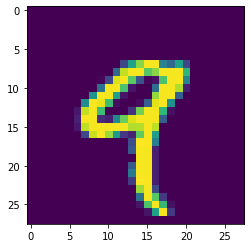

In [8]:
plt.imshow(sampledigit)

## Splitting Data into Training and Test Sets

In [9]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [10]:
print(train_img.shape)

(60000, 784)


In [11]:
print(train_lbl.shape)

(60000,)


In [12]:
print(test_img.shape)

(10000, 784)


In [13]:
print(test_lbl.shape)

(10000,)


## Standardizing the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

Notebook going over the importance of feature Scaling: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)

<b>Step 0:</b> Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [15]:
from sklearn.decomposition import PCA

Make an instance of the Model

In [19]:
pca = PCA(0.85)

Fit PCA on training set. <b>Note: you are fitting PCA on the training set only</b>

In [20]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.n_components_

182

Apply the mapping (transform) to <b>both</b> the training set and the test set. 

In [22]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

<b>Step 1: </b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [23]:
from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

In [24]:

# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [25]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<b>Step 4:</b> Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [26]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [27]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [28]:
test_img[0:10]

array([[ 9.3957676 ,  0.77401867,  0.87458164, ..., -0.92278326,
        -0.78694206, -0.08337314],
       [-1.92136163,  3.39653395, -3.3247254 , ..., -0.42130992,
         1.38842477,  0.27653972],
       [-7.81562461,  0.75219135,  1.00061721, ...,  0.10853265,
        -0.14205216, -0.27494885],
       ...,
       [-7.4984688 , -3.94435688,  4.74264851, ..., -0.15729895,
        -0.02634505,  0.49819874],
       [-6.89588453, -2.09750186,  4.1214471 , ...,  0.33669482,
        -0.70412028,  0.08806753],
       [-1.85100606, 13.61624971, -2.44503885, ..., -0.89257983,
         1.22732317,  0.74779031]])

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [29]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9191


In [31]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

Figure(720x504)


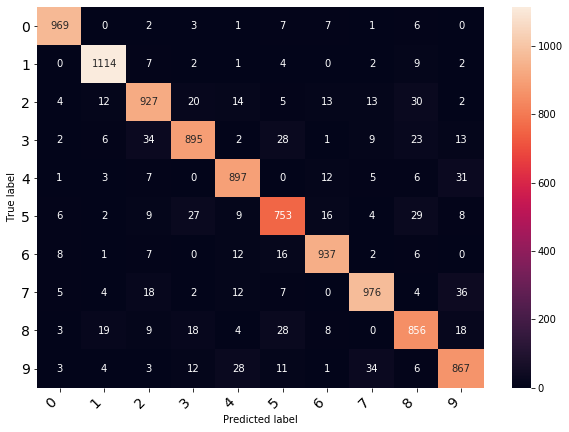

In [34]:
from srtools import print_confusion_matrix
mymatrix = cm(test_lbl,logisticRegr.predict(test_img))
print(print_confusion_matrix(mymatrix, logisticRegr.classes_, figsize = (10,7), fontsize=14))

In [36]:
print(cr(test_lbl,logisticRegr.predict(test_img)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.96      0.98      0.97      1141
           2       0.91      0.89      0.90      1040
           3       0.91      0.88      0.90      1013
           4       0.92      0.93      0.92       962
           5       0.88      0.87      0.87       863
           6       0.94      0.95      0.94       989
           7       0.93      0.92      0.93      1064
           8       0.88      0.89      0.88       963
           9       0.89      0.89      0.89       969

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Number of Components, Variance, Time Table

In [25]:
pd.DataFrame(data = [[1.00, 784, 48.94, .9158],
                     [.99, 541, 34.69, .9169],
                     [.95, 330, 13.89, .92],
                     [.90, 236, 10.56, .9168],
                     [.85, 184, 8.85, .9156]], 
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy']).head()

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,784,48.94,0.9158
1,0.99,541,34.69,0.9169
2,0.95,330,13.89,0.9200
3,0.90,236,10.56,0.9168
4,0.85,184,8.85,0.9156
